# GDP by Governorate 

By: Ahmed Khaled

In this notebook, we analyze a data that illustrate the GDP for each of the 27 governorates of Egypt in 25 fields.

For each field we show,

1. The GDP for each governorate for each year
1. The GDP for each region for each year
1. The Overall GDP for Egypt for each year

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
gdp_data = pd.read_csv("gdp.csv")
gdp_data.head()

,�..Indicator,Unit,Governorate,Region,Year,Agriculture,Crude.Petroleum.Extraction,Other.extractions,Petroleum.Refinement,Manufacturing.Industries,...,Business.Services,Education,Health,Other.Services,Non.Financial.Corporations,Financial.Corporations,General.Government,Non.Profit.Institutions.Serving.House.hold.Sector,DomesticWorkers,Total.Governorate.GDP
0,"Regional accounts , GDP by governorate",One thousand EGP,Cairo,Greater Cairo,2016/2015,7713050.23,336595.54,20388128.40,20496191.28,1.296175e+08,...,66318498.90,16056355.02,30056276.38,5120189.18,7.991524e+08,42248215.48,1.497779e+08,4381236.27,774531.50,9.963344e+08
1,"Regional accounts , GDP by governorate",One thousand EGP,Giza,Greater Cairo,2016/2015,13720510.15,0.00,63787.50,58950.76,4.621995e+07,...,11112918.48,7875998.26,7354926.94,1638487.79,1.889047e+08,17352073.83,1.598743e+07,953713.02,342030.18,2.235400e+08
2,"Regional accounts , GDP by governorate",One thousand EGP,Qalyubia,Greater Cairo,2016/2015,10582517.75,0.00,51708.12,6872407.80,2.497069e+07,...,392845.62,5443468.66,1548588.16,418643.30,7.372928e+07,6401500.27,6.026419e+06,95296.75,158877.55,8.641137e+07
3,"Regional accounts , GDP by governorate",One thousand EGP,Total Greater Cairo region,Greater Cairo,2016/2015,32016078.13,336595.54,20503624.03,27427549.83,2.008081e+08,...,77824263.00,29375821.94,38959791.48,7177320.28,1.061786e+09,66001789.58,1.717918e+08,5430246.04,1275439.23,1.306286e+09
4,"Regional accounts , GDP by governorate",One thousand EGP,Asyut,Central Upper Egypt,2016/2015,14268501.25,0.00,2529.34,5529455.61,7.275277e+06,...,200710.83,688796.62,989070.87,121091.46,4.765557e+07,4174981.95,6.428189e+06,19898.97,26479.90,5.830512e+07


In [26]:
gdp_data = gdp_data.iloc[:, 2:]

In [28]:
gdp_data.head()

,Governorate,Region,Year,Agriculture,Crude.Petroleum.Extraction,Other.extractions,Petroleum.Refinement,Manufacturing.Industries,Electricity.and.Gas,Water,...,Business.Services,Education,Health,Other.Services,Non.Financial.Corporations,Financial.Corporations,General.Government,Non.Profit.Institutions.Serving.House.hold.Sector,DomesticWorkers,Total.Governorate.GDP
0,Cairo,Greater Cairo,2016/2015,7713050.23,336595.54,20388128.40,20496191.28,1.296175e+08,6000408.16,655588.96,...,66318498.90,16056355.02,30056276.38,5120189.18,7.991524e+08,42248215.48,1.497779e+08,4381236.27,774531.50,9.963344e+08
1,Giza,Greater Cairo,2016/2015,13720510.15,0.00,63787.50,58950.76,4.621995e+07,748253.09,1645457.46,...,11112918.48,7875998.26,7354926.94,1638487.79,1.889047e+08,17352073.83,1.598743e+07,953713.02,342030.18,2.235400e+08
2,Qalyubia,Greater Cairo,2016/2015,10582517.75,0.00,51708.12,6872407.80,2.497069e+07,0.00,76769.94,...,392845.62,5443468.66,1548588.16,418643.30,7.372928e+07,6401500.27,6.026419e+06,95296.75,158877.55,8.641137e+07
3,Total Greater Cairo region,Greater Cairo,2016/2015,32016078.13,336595.54,20503624.03,27427549.83,2.008081e+08,6748661.25,2377816.36,...,77824263.00,29375821.94,38959791.48,7177320.28,1.061786e+09,66001789.58,1.717918e+08,5430246.04,1275439.23,1.306286e+09
4,Asyut,Central Upper Egypt,2016/2015,14268501.25,0.00,2529.34,5529455.61,7.275277e+06,0.00,295136.41,...,200710.83,688796.62,989070.87,121091.46,4.765557e+07,4174981.95,6.428189e+06,19898.97,26479.90,5.830512e+07


In [29]:
gdp_data.describe()

,Agriculture,Crude.Petroleum.Extraction,Other.extractions,Petroleum.Refinement,Manufacturing.Industries,Electricity.and.Gas,Water,Sewerage,Waste.Recycling,Construction,...,Business.Services,Education,Health,Other.Services,Non.Financial.Corporations,Financial.Corporations,General.Government,Non.Profit.Institutions.Serving.House.hold.Sector,DomesticWorkers,Total.Governorate.GDP
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,140.000000,1.400000e+02,1.400000e+02,...,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,2.243379e+07,2.287660e+07,2.796147e+06,1.388132e+06,2.543390e+07,1.766825e+06,9.684693e+05,26459.672429,1.239364e+05,1.013400e+07,...,5.844961e+06,3.733865e+06,4.560834e+06,1.068050e+06,1.630681e+08,9.287606e+06,1.956757e+07,6.037630e+05,1.684072e+05,1.926954e+08
std,4.524038e+07,5.179830e+07,6.973370e+06,1.021827e+07,5.757985e+07,3.720616e+06,1.932117e+06,92301.860632,3.517553e+05,2.143347e+07,...,1.745151e+07,8.291174e+06,1.081763e+07,2.364416e+06,3.515699e+08,2.030045e+07,4.753669e+07,1.523246e+06,3.747701e+05,4.198510e+08
min,1.353245e+05,0.000000e+00,1.712100e+03,-2.642120e+07,5.827367e+04,0.000000e+00,-2.224800e+02,0.000000,0.000000e+00,5.609326e+04,...,7.510460e+03,4.110020e+04,3.059678e+04,8.701370e+03,1.555742e+06,1.463717e+05,3.143820e+05,7.890000e+02,0.000000e+00,2.739328e+06
25%,3.873771e+06,0.000000e+00,1.874761e+04,0.000000e+00,1.763486e+06,0.000000e+00,1.819245e+05,0.000000,0.000000e+00,9.792375e+05,...,1.450401e+05,3.022857e+05,3.267573e+05,1.059915e+05,2.749167e+07,1.291003e+06,1.876943e+06,1.157309e+04,1.323811e+04,3.278625e+07
50%,1.045806e+07,5.341306e+05,7.709903e+04,0.000000e+00,5.396454e+06,3.700864e+05,3.627919e+05,0.000000,1.497831e+04,4.654734e+06,...,2.532072e+05,7.885292e+05,8.040208e+05,2.208828e+05,4.817594e+07,3.121571e+06,5.061173e+06,3.487249e+04,4.068464e+04,5.482798e+07
75%,2.393474e+07,1.835879e+07,8.145238e+05,4.796575e+02,2.138425e+07,2.089127e+06,1.124024e+06,8697.655000,3.936933e+04,8.317106e+06,...,9.340992e+05,3.053909e+06,2.037362e+06,5.942576e+05,1.204735e+08,6.542271e+06,1.001276e+07,1.061481e+05,1.311865e+05,1.341455e+08
max,3.179874e+08,3.224694e+08,3.948009e+07,7.604560e+07,3.663248e+08,2.184590e+07,1.350960e+07,629186.890000,1.721230e+06,1.569495e+08,...,8.522891e+07,5.414538e+07,6.612774e+07,1.516186e+07,2.261419e+09,1.322797e+08,2.764877e+08,8.476600e+06,2.623700e+06,2.681286e+09


Let's make all GDP in millions instead of thousands for minimizing the gap in the visualizations.

In [30]:
fields = gdp_data.columns[3:]
for field in fields:
    gdp_data.loc[:, [field]] /= 1000

Let's make all negative values in all fields 0s.

In [31]:
for field in fields:
    gdp_data.loc[:, [field]] = gdp_data[[field]].apply(lambda x: max([x[0], 0]), axis = 1)

In [32]:
gdp_data.head()

,Governorate,Region,Year,Agriculture,Crude.Petroleum.Extraction,Other.extractions,Petroleum.Refinement,Manufacturing.Industries,Electricity.and.Gas,Water,...,Business.Services,Education,Health,Other.Services,Non.Financial.Corporations,Financial.Corporations,General.Government,Non.Profit.Institutions.Serving.House.hold.Sector,DomesticWorkers,Total.Governorate.GDP
0,Cairo,Greater Cairo,2016/2015,7713.05023,336.59554,20388.12840,20496.19128,129617.47672,6000.40816,655.58896,...,66318.49890,16056.35502,30056.27638,5120.18918,7.991524e+05,42248.21548,149777.92444,4381.23627,774.53150,9.963344e+05
1,Giza,Greater Cairo,2016/2015,13720.51015,0.00000,63.78750,58.95076,46219.95212,748.25309,1645.45746,...,11112.91848,7875.99826,7354.92694,1638.48779,1.889047e+05,17352.07383,15987.42994,953.71302,342.03018,2.235400e+05
2,Qalyubia,Greater Cairo,2016/2015,10582.51775,0.00000,51.70812,6872.40780,24970.68644,0.00000,76.76994,...,392.84562,5443.46866,1548.58816,418.64330,7.372928e+04,6401.50027,6026.41915,95.29675,158.87755,8.641137e+04
3,Total Greater Cairo region,Greater Cairo,2016/2015,32016.07813,336.59554,20503.62403,27427.54983,200808.11528,6748.66125,2377.81636,...,77824.26300,29375.82194,38959.79148,7177.32028,1.061786e+06,66001.78958,171791.77353,5430.24604,1275.43923,1.306286e+06
4,Asyut,Central Upper Egypt,2016/2015,14268.50125,0.00000,2.52934,5529.45561,7275.27729,0.00000,295.13641,...,200.71083,688.79662,989.07087,121.09146,4.765557e+04,4174.98195,6428.18926,19.89897,26.47990,5.830512e+04


Let's make sub-datasets of the overall data into governorate dataset and region dataset.

In [33]:
gdp_data.Governorate.unique()

array(['Cairo', 'Giza', 'Qalyubia', 'Total Greater Cairo region', 'Asyut',
       'New Valley', 'Total Central Upper Egypt', 'Suez', 'Ismailia',
       'Sharqia', 'Port Said', 'North Sinai', 'South Sinai',
       'Total Suez Canal region', 'Beheira', 'Alexandria', 'Matruh',
       'Total Alexandria region', 'Fayoum', 'Beni Suef', 'Minya',
       'Total North Upper Egypt region', 'Aswan', 'Luxor', 'Sohag',
       'Qena', 'Red Sea', 'Total South Upper Egypt', 'Gharbia',
       'Menoufia', 'Kafr ElSheikh', 'Dakahlia', 'Damietta',
       'Total Delta region', 'Total Egypt'], dtype=object)

In [34]:
governorates = []
regions = []
for gov in gdp_data.Governorate.unique():
    if gov[:5] == "Total" and gov != "Total Egypt":
        regions.append(gov)
    elif gov != "Total Egypt":
        governorates.append(gov)
        
print(governorates, len(governorates))
print(regions, len(regions))

['Cairo', 'Giza', 'Qalyubia', 'Asyut', 'New Valley', 'Suez', 'Ismailia', 'Sharqia', 'Port Said', 'North Sinai', 'South Sinai', 'Beheira', 'Alexandria', 'Matruh', 'Fayoum', 'Beni Suef', 'Minya', 'Aswan', 'Luxor', 'Sohag', 'Qena', 'Red Sea', 'Gharbia', 'Menoufia', 'Kafr ElSheikh', 'Dakahlia', 'Damietta'] 27
['Total Greater Cairo region', 'Total Central Upper Egypt', 'Total Suez Canal region', 'Total Alexandria region', 'Total North Upper Egypt region', 'Total South Upper Egypt', 'Total Delta region'] 7


In [35]:
governorates_gdp = gdp_data[gdp_data.Governorate.isin(governorates)]

In [36]:
regions_gdp = gdp_data[gdp_data.Governorate.isin(regions)].drop(columns=["Region"])

## The GDP for each governorate for each year for each field

Testing...

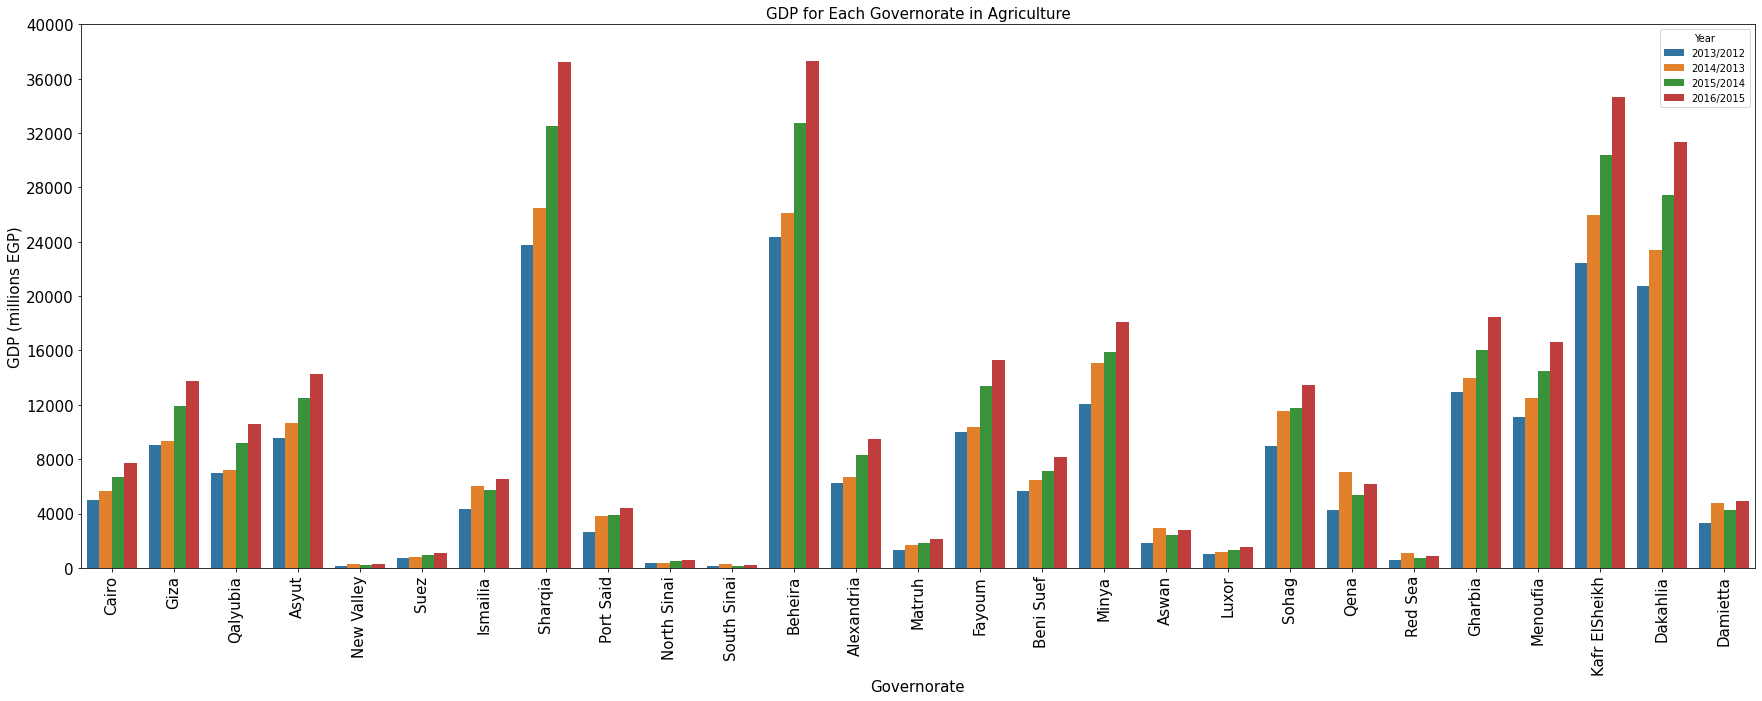

In [37]:
field = "Agriculture"
field_subdata = governorates_gdp[["Governorate", "Year", field]]
plt.figure(figsize=(30, 10))
sns.barplot(
    data = field_subdata,
    x = "Governorate",
    y = field,
    hue = "Year",
    hue_order = ["2013/2012", "2014/2013", "2015/2014", "2016/2015"],
)

plt.xlabel("Governorate", fontsize=15)
plt.xticks(range(len(governorates)), governorates, fontsize=15, rotation=90)
plt.ylabel("GDP (millions EGP)", fontsize=15)
plt.yticks(list(np.arange(0, 40000+2000, 4000)), fontsize=15)
plt.title(f"GDP for Each Governorate in {field}", fontsize=15);

The following function is to round the number to the nearest x0s. For example,

* 2 --> 0
* 9 --> 10
* 11 --> 10
* 19 --> 20
* 131 --> 100
* 198 --> 200
* 1214 --> 1000
* 5984 --> 6000

And so on.

In [12]:
def round_x0s(number):
    exponent = len(str(int(number))) - 1
    return (10 ** exponent) * (round(number / (10 ** exponent)))

print(round_x0s(2))
print(round_x0s(9))
print(round_x0s(11))
print(round_x0s(19))
print(round_x0s(131))
print(round_x0s(198))
print(round_x0s(1214))
print(round_x0s(5984))

2
9
10
20
100
200
1000
6000


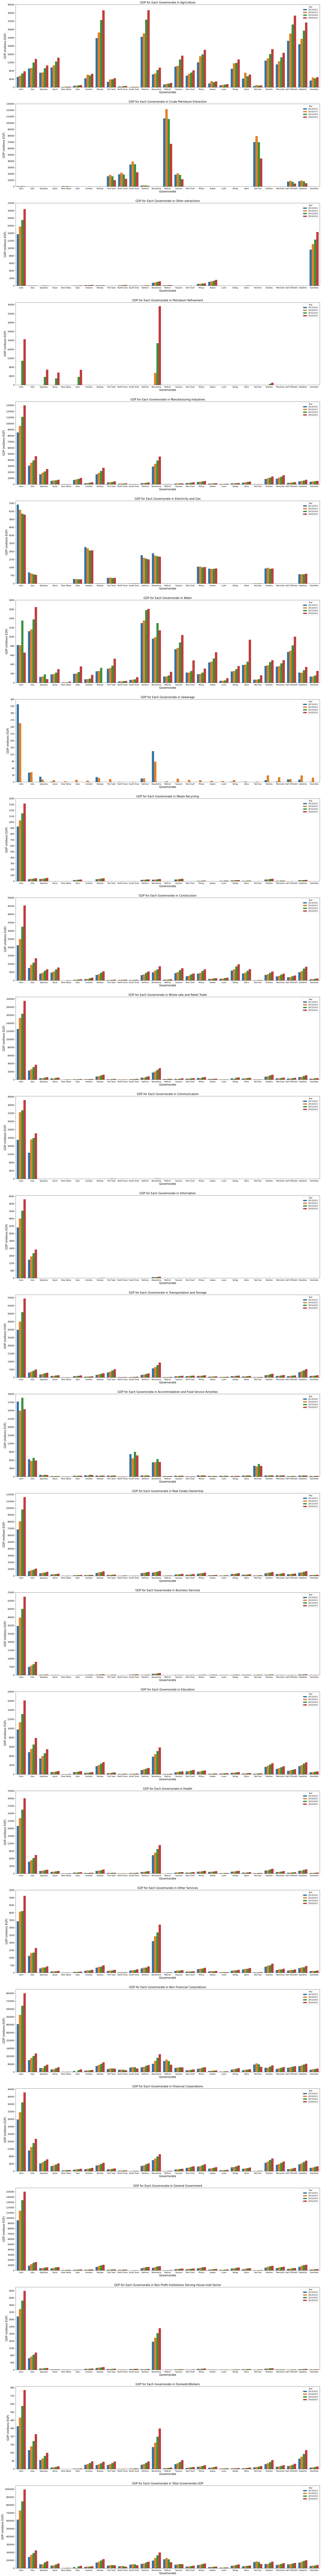

In [13]:
fig, axes = plt.subplots(len(fields), 1, figsize=(30, 10 * len(fields)))
for i, field in enumerate(fields):
    field_subdata = governorates_gdp[["Governorate", "Year", field]]
    ax = axes[i]
    sns.barplot(
        data = field_subdata,
        x = "Governorate",
        y = field,
        hue = "Year",
        hue_order = ["2013/2012", "2014/2013", "2015/2014", "2016/2015"],
        ax = ax
    )

    ax.set_xlabel("Governorate", fontsize=15)
    ax.set_ylabel("GDP (millions EGP)", fontsize=15)
    max_gdp_label = round_x0s(field_subdata[field].max()/10)
    ax.yaxis.set_ticks(np.arange(0, field_subdata[field].max() + max_gdp_label, max_gdp_label), labels=[str(int(y)) for y in np.arange(0, field_subdata[field].max() + max_gdp_label, max_gdp_label)], fontsize=12)
    ax.set_title(f"GDP for Each Governorate in {field.replace('.', ' ')}", fontsize=15);
    
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"visualizations/governorate_{field.replace('.', '_')}.jpg", bbox_inches=extent.expanded(1.1, 1.2))


## 2. The GDP for each region for each year

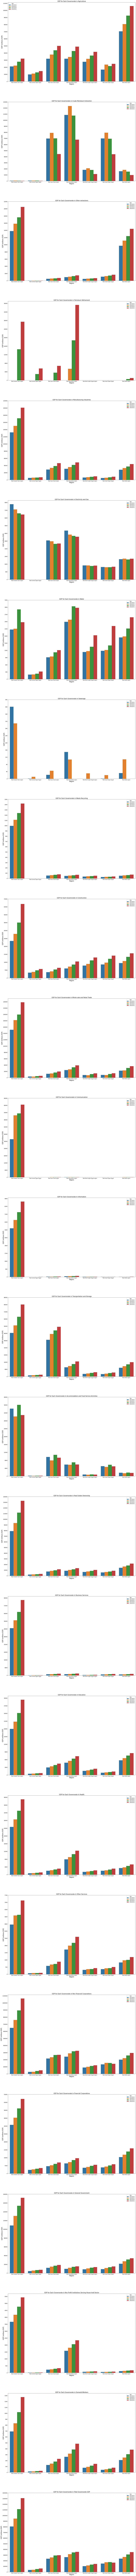

In [14]:
fig, axes = plt.subplots(len(fields), 1, figsize=(25, 15 * len(fields)))
fig.tight_layout(pad=20.0)
for i, field in enumerate(fields):
    field_subdata = regions_gdp[["Governorate", "Year", field]]
    ax = axes[i]
    sns.barplot(
        data = field_subdata,
        x = "Governorate",
        y = field,
        hue = "Year",
        hue_order = ["2013/2012", "2014/2013", "2015/2014", "2016/2015"],
        ax = ax
    )

    ax.set_xlabel("Region", fontsize=15)
    ax.set_ylabel("GDP (millions EGP)", fontsize=15)
    max_gdp_label = round_x0s(regions_gdp[field].max()/10)
    ax.yaxis.set_ticks(np.arange(0, regions_gdp[field].max() + max_gdp_label, max_gdp_label), labels=[str(int(y)) for y in np.arange(0, regions_gdp[field].max() + max_gdp_label, max_gdp_label)], fontsize=12)
    ax.set_title(f"GDP for Each Governorate in {field.replace('.', ' ')}", fontsize=15);
    
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"visualizations/region_{field.replace('.', '_')}.jpg", bbox_inches=extent.expanded(1.5, 1.2))


## 3. The Overall GDP for Egypt for each year

In [22]:
egypt_gdp = gdp_data[gdp_data.Governorate == "Total Egypt"].sort_values("Year")
egypt_gdp

,Governorate,Region,Year,Agriculture,Crude.Petroleum.Extraction,Other.extractions,Petroleum.Refinement,Manufacturing.Industries,Electricity.and.Gas,Water,...,Business.Services,Education,Health,Other.Services,Non.Financial.Corporations,Financial.Corporations,General.Government,Non.Profit.Institutions.Serving.House.hold.Sector,DomesticWorkers,Total.Governorate.GDP
139,Total Egypt,Total Egypt,2013/2012,209500.4018,284219.1371,26568.66783,0.00000,237365.9031,21845.89937,9615.82500,...,53496.92284,34424.03058,42121.37988,10222.24818,1559062.276,86546.47082,174233.898,5730.306,1425.60200,1826998.553
104,Total Egypt,Total Egypt,2014/2013,241654.5999,322469.4002,30493.30000,0.00000,272258.5000,20844.00000,9898.61262,...,62283.30000,39692.10000,48298.00000,12000.50000,1791926.900,98953.30000,213143.700,6529.203,1710.70000,2112263.803
69,Total Egypt,Total Egypt,2015/2014,277767.6000,282343.7000,33944.80000,40363.00000,310966.0000,19896.70000,12171.20000,...,71755.70000,45985.50000,56291.80000,12457.70000,2047519.600,115642.10000,249288.000,7439.500,2099.00000,2421988.200
34,Total Egypt,Total Egypt,2016/2015,317987.4332,178542.5350,39480.09349,76045.60318,366324.7616,19865.24681,13509.59804,...,85228.90941,54145.38300,66127.74498,15161.86433,2261418.540,132279.72390,276487.700,8476.600,2623.70001,2681286.263


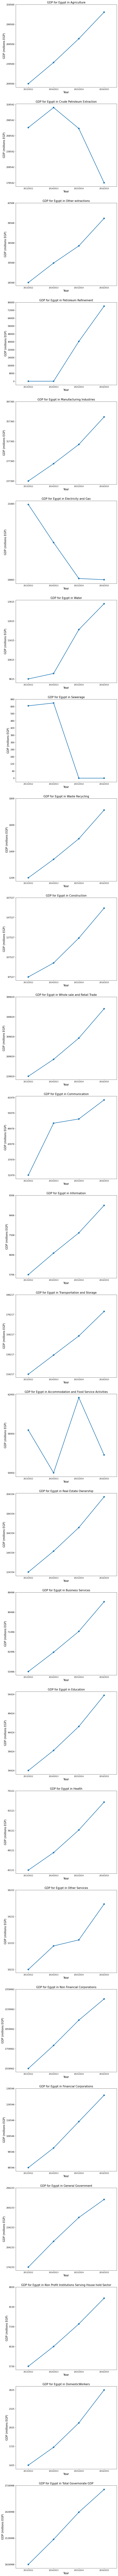

In [23]:
fig, axes = plt.subplots(len(fields), 1, figsize=(10, 10 * len(fields)))
for i, field in enumerate(fields):
    field_subdata = egypt_gdp[["Governorate", "Year", field]]
    ax = axes[i]
    sns.pointplot(
        data = field_subdata,
        x = "Year",
        y = field,
        ax = ax
    )

    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("GDP (millions EGP)", fontsize=15)
    max_gdp_label = round_x0s(egypt_gdp[field].max()/10)
    ax.yaxis.set_ticks(np.arange(egypt_gdp[field].min(), egypt_gdp[field].max() + max_gdp_label, max_gdp_label), labels=[str(int(y)) for y in np.arange(egypt_gdp[field].min(), egypt_gdp[field].max() + max_gdp_label, max_gdp_label)], fontsize=12)
    ax.set_title(f"GDP for Egypt in {field.replace('.', ' ')}", fontsize=15);
    
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"visualizations/egypt_{field.replace('.', '_')}.jpg", bbox_inches=extent.expanded(1.5, 1.2))
